# Лабораторная работа #3

## Цель работы 

Знакомство и освоение работы с моделью машинного обучения типа многослойный перцептрон для решения задачи регрессии с использованием библиотеки Tensorflow.

### Ход работы 

1. Разобрать этапы базового примера - Проверки работы нейросети

2. Загрузка данных

  1) Выполнить загрузку файла с подготовленным набором данных (отчищенный от пропусков и выбросов для целевой и независимых переменных) в таблицу _df_

  2) Объявить список независимых и целевой переменных

  3) Оставить в таблице данных _df_ столбцы, относящиеся только к списку независимых и целевой переменных



2. Выполнить процедуру НОРМАЛИЗАЦИИ данных и сохранить в отдельную таблицу

  1) Отделить X от Y исходной таблицы и сформировать новые dfX и dfY

  2) Используя класс MinMaxScaler получить нормализованые версии dfX и dfY и сохранить их в dfXNorm и dfYNorm соответственно

  2) Для X и Y построить гистограммы распределения нормализованных и исходных значений 
  

3. Сформировать обучающую и проверочную части:

  1) На основе нормализированой выборки сформировать _xNorm__train_ , _xNorm__test_ , _yNorm__train_ , _yNorm__test_


4. Определить структуру четырех моделей (кол-во узлов на входных, выходных и скрытых слоях).
```
m1 - два вход -> один выход (2->1)
m2 - два входа -> скрытые слои -> один выход (пример 2->...->...->1)
m3 - несколько входов -> один выход (пример 5->1)
m4 - несколько входов -> скрытые слои -> один выход (пример 5->...->...->1)
```
 
5. Для каждой модели (m1, m2, m3, m4) нейронной сети:

  1) Провести процедуру обучения сети, во время которой фиксировать значения оценок потерь
    
  2) Получить значения целевой переменной "yNorm" на проверочном(TEST) наборе
    
  3) Получить значения метрик точности на проверочном(TEST) наборе: R2(коэфф. детерминации) и RMSE (среднеквадратичное отклонение) 
    
  4) Построить диаграмму рассеяния вычисленных значений Y_pred от проверочных значений Y_test
    
  5) Построить гистограмму остатков (разностей между Y_pred и Y_test)

  6) Для моделей m1 и m2: 
      * Построить 3d график зависимости вычисленных значений Y_pred от объясняющих признаков x1 и x2
    
  8) Для модели m1 и m3:
      * Получить весовые коэфф. w и bias
         
6. Составить сводную таблицу и провести сравнение точности полученых моделей в зависимости от структуры модели

7. Сделать выводы о влиянии структуры на точность и эффектовности применения нейронных сетей на вашем наборе данных 


### Содержание отчета
<font color='red'>Название отчета должно быть в формате:
<br>АВТ-9xx_ЛР-xx_Фамилия1_Фамилия2
</font>

1. Список выбранных целевой переменной 'y' и независимых признаков 'x1, x2, x3, ...'

2. Описание процесса загрузки и НОРМАЛИЗАЦИИ с выводом значений таблиц

3. Гистограммы распределения исходных и шкалированых значений для целевой переменной 'y' и независимых признаков 'x1, x2, x3, ...'

4. Этапы построения и оценки  точности моделей (m1, m2, m3, m4)
  
5. Сводная таблица оценок точности с указанием структуры модели

6. Выводы по результатам сравнительного анализа полученных регрессионных моделей

### Рекомендуемые материалы

- [Eng][Видео] Принцип и этапы работы нейронных сетей, URL: https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi
- [Eng]Примеры и приемы работы с Pytorch #1, URL: https://github.com/yunjey/pytorch-tutorial
- [Eng]Примеры и приемы работы с Pytorch #2, URL: https://github.com/python-engineer/pytorchTutorial


- [Eng]Страница курса CS231n Convolutional Neural Networks for Visual Recognition:
  - Введение и архитектура, URL: https://cs231n.github.io/neural-networks-1/
  - Обработка данных, URL: https://cs231n.github.io/neural-networks-2/
- [Eng]Сравнение и обзор функций активации,  URL: https://arxiv.org/pdf/1710.05941.pdf


  
- [Ru]Открытый курс машинного обучения. Тема 4. Линейные модели классификации и регрессии, URL: https://habr.com/ru/company/ods/blog/323890/
- [Ru]Дьяконов, Линейная регрессия++, URL: https://dyakonov.org/2019/10/31/%d0%bb%d0%b8%d0%bd%d0%b5%d0%b9%d0%bd%d0%b0%d1%8f-%d1%80%d0%b5%d0%b3%d1%80%d0%b5%d1%81%d1%81%d0%b8%d1%8f/
- [Ru]Дьяконов,Метрики оценки точности, URL: https://alexanderdyakonov.files.wordpress.com/2018/10/book_08_metrics_12_blog1.pdf




## Подключение библиотек

In [106]:
# Python 3.8
import pandas as pd #обработка (загрузка, сохранение, анализа) данных
import numpy  as np #обработка многомерных массивов, линейная алгебра, преобразование Фурье, случайные числа

from sklearn import linear_model # (классификация, регрессия, кластеризация...)
from sklearn import metrics
from sklearn import datasets
from sklearn import ensemble
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

import scipy #пакет для выполнения научных и инженерных расчётов.
import seaborn as sns #визуализация данных (на базе matplotlib)

from IPython.display import clear_output
import plotly.graph_objects as go
import tensorflow as tf

### Загрузка данных

In [107]:
DataFrame=pd.read_csv('../data/insurance_data_Ready.csv',sep=',',header=0)

DataFrame.query("`smoker_no` == 1 and `sex_female` == 1", inplace=True)
target=['charges']
features=['smoker_no','sex_female','age','bmi','children','reg_southwest']
DataFrame =  DataFrame [features + target]
DataFrame[:10]

,smoker_no,sex_female,age,bmi,children,reg_southwest,charges
4,1,1,31.0,25.740,0.0,0,3756.62160
5,1,1,46.0,33.440,1.0,0,8240.58960
6,1,1,37.0,27.740,3.0,0,7281.50560
8,1,1,60.0,25.840,0.0,0,28923.13692
11,1,1,56.0,39.820,0.0,0,11090.71780
13,1,1,52.0,30.780,1.0,0,10797.33620
17,1,1,60.0,36.005,0.0,0,13228.84695
18,1,1,30.0,32.400,1.0,1,4149.73600
21,1,1,59.0,27.720,3.0,0,14001.13380
22,1,1,63.0,23.085,0.0,0,14451.83515


In [108]:
scaler = StandardScaler()
#Вычисление значений среднего и дисперсии отдельно для каждого признака
scaler.fit(DataFrame)

print (" {:>3} {:<25} {:>16} {:>16}".format("№", "Признак", "Средрее", "Ср.кв.откл."))
for icol in range (0, len(DataFrame.columns)):
    print (" {:>3} {:<25} {:>16.3f} {:>16.3f}".format(
                   icol, 
                   DataFrame.columns[icol],
                   scaler.mean_[icol],
                   np.sqrt ( scaler.var_[icol]),
                  )
          )

   № Признак                            Средрее      Ср.кв.откл.
   0 smoker_no                            1.000            0.000
   1 sex_female                           1.000            0.000
   2 age                                 40.778           13.587
   3 bmi                                 30.499            5.812
   4 children                             1.120            1.208
   5 reg_southwest                        0.250            0.433
   6 charges                           9029.055         5961.351


In [109]:
# создать новую таблицу (DataFrame) 
# со стандартизированными значениями

DataFrame_scaled = pd.DataFrame (
  data    = scaler.transform(DataFrame), # значения ячеек
  columns = DataFrame.columns,           # названия столбцов
  index   = DataFrame.index              # идентификаторы строк
)
DataFrame_scaled[:5]


,smoker_no,sex_female,age,bmi,children,reg_southwest,charges
4,0.0,0.0,-0.719612,-0.818803,-0.926987,-0.57735,-0.884436
5,0.0,0.0,0.384363,0.505994,-0.099378,-0.57735,-0.132263
6,0.0,0.0,-0.278022,-0.474700,1.555839,-0.57735,-0.293147
8,0.0,0.0,1.414739,-0.801597,-0.926987,-0.57735,3.337177
11,0.0,0.0,1.120346,1.603683,-0.926987,-0.57735,0.345838


In [110]:
print("Num CPUs Available: ", len(tf.config.list_physical_devices('CPU')))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(False)
tf.config.set_soft_device_placement(False)

Num CPUs Available:  1
Num GPUs Available:  0


### Объявление функций

Для повышения повторяемости кода и повышения уровня читаемости объявим несколько функций с уже знакомыми операциями

In [111]:
def PLOT34(y_test, y_pred):
    '''
    Функция построения графиков
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    plt.figure(figsize=(12,6))
    
    # == Диаграмма рассеяния вычисленных значений ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс текущего полотна в сетке
    plt.subplot(121)
    plt.scatter(y_test, y_pred,  alpha=0.1)
    plt.scatter(y_test, y_test,  alpha=0.1)
    plt.title('Диаграмма рассеяния вычисленных значений');
    plt.xlabel('Проверочное Y')
    plt.ylabel('Вычисленное Y')

    
    # == Диаграмма рассеяния ошибок ==
    # создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс текущего полотна в сетке
    plt.subplot(122)
    plt.scatter(y_test, (y_test - y_pred)**2,  alpha=0.1)
    plt.title('Диаграмма рассеяния квадрата абсолютной ошибки')
    plt.xlabel('Проверочное Y')
    plt.ylabel('Квадрат абсолютной ошибки')
#--------------------------------------------------------------------------

In [112]:
def GET_METRICS_SINGLE(y_test, y_pred):
    '''
    Вычисление и вывод метрик: MAE, RMSE, R2.
    На основе сравнения проверочных и вычисленных.
    :param y_test: - проверочные значения целевой переменный
    :param y_pred: - вычисленные значения целевой переменный
    '''
    mae  = metrics.mean_absolute_error        (y_test, y_pred)
    mse  = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2   = metrics.r2_score                   (y_test, y_pred)

    print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
    print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
    print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
    print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
#--------------------------------------------------------------------------

In [113]:
def my3dplot (  x_train, y_train,  isDrawTrain,
                x_test, y_test,    isDrawTest,
                y_pred,            isDrawPred,
                x1Name, x2Name, y_targetName):
    """
    Отображает 3д график исходных и вычисленых точек
    
    x_test, y_test, x_train, y_train - обучающиа и проверочная чатсти исходной таблицы  (тип DataFrame)
    y_pred, - вычисленные значения (тип DataFrame)
    x1Name, x2Name - имя столбца для x1 и x2 (тип стрококвый)
    y_targetName   - имя столбца целевого    (тип стрококвый)
    
    """
    sTransparencyVal  = 0.9 # Прозрачность поверхности вычисленных значений y_pred
    mTransparencyVal  = 0.3 # Прозрачность точек графика train, test
    mSize = 5   # Размер точки

    # Построить поверхность соотвествующую вычисленным значениям
    trace_LinModel = go.Mesh3d(
                       x= x_test[ x1Name ].values,
                       y= x_test[ x2Name ].values,
                       z= y_pred.reshape(-1), # <-- Вычисленные
                       name="Вычисленный",
                       opacity=sTransparencyVal,
                       #alphahull=1,
                       color='rgba(100,244,100,0.6)',
                      )
    
    # Построить рассеяние обучающих точек 
    trace_Train = go.Scatter3d (x= x_train[ x1Name ].values, # <-- Обучающие
                                y= x_train[ x2Name ].values, # <-- Обучающие
                                z= y_train[ y_targetName ].values,     # <-- Обучающие
                                name="Обучающие",
                                mode='markers',
                                marker=dict(
                                   size=mSize,
                                   color=y_train[ y_targetName ].values, # Источник значений цвета <-- Обучающие
                                   colorscale='Blues',        # Название цветовой шкалы # _r
                                   opacity=mTransparencyVal
                                ))
    
    # Построить рассеяние проверочных точек 
    trace_Test = go.Scatter3d (x= x_test[ x1Name ].values,# <-- Проверочные
                               y= x_test[ x2Name ].values,# <-- Проверочные
                               z= y_test[ y_targetName ].values,    # <-- Проверочные
                               name="Проверочные",
                               mode='markers',
                               marker=dict(
                                  size=mSize,
                                  color=y_test[y_targetName].values, # Источник значений цвета <-- Проверочные
                                  colorscale='Reds',        # Название цветовой шкалы # _r
                                  opacity=mTransparencyVal
                               ))

    # Составить список элементов к отрисовке на графике
    ListForDraw = []
    if isDrawTrain: ListForDraw.append(trace_Train)
    if isDrawTest:  ListForDraw.append(trace_Test)
    if isDrawPred:  ListForDraw.append(trace_LinModel)

    # Отрисовать все указанные элементы
    fig = go.Figure( data=ListForDraw)

    # Добавить подписи осей
    fig.update_layout(
        title='Завиcимость {} от ({}, {})'.format(y_targetName, x1Name, x2Name), 
        scene=dict(
            xaxis_title=x1Name,
            yaxis_title=x2Name,
            zaxis_title=y_targetName,
        ),
    )
    fig.show()
#--------------------------------------------------------------------------

## Tensorflow.

In [114]:
transparencyVal = 0.3  # Прозрачность точек графика
markerSize = 10        # Размер точки

N = 1000 # кол-во точек X
noiseLevel= 0.05 # степень зашумленности
X = np.linspace(-1., 1., N).reshape(-1, 1) # привести массив к столбчатой структуре
Y_noise = np.random.normal(-noiseLevel,noiseLevel,N).reshape(-1, 1)

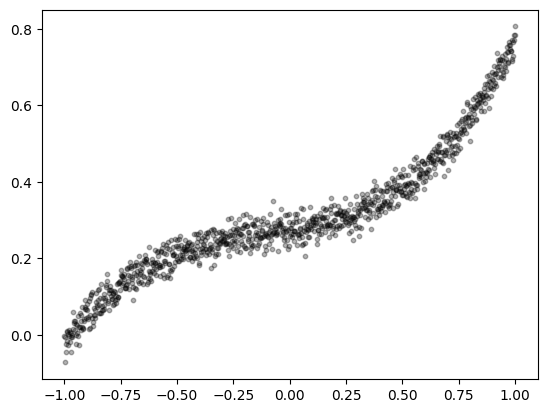

In [115]:
# Полином
Y_polyn = (0.3*(X**3) + 0.1*(X**2) + 0.1 * X + 0.3).reshape(-1, 1) # привести массив к столбчатой структуре
Y_polyn = Y_polyn + Y_noise/2
plt.scatter(X, Y_polyn, s=markerSize, color="black", alpha=transparencyVal)

Text(0.5, 0, 'Объясняющий X')

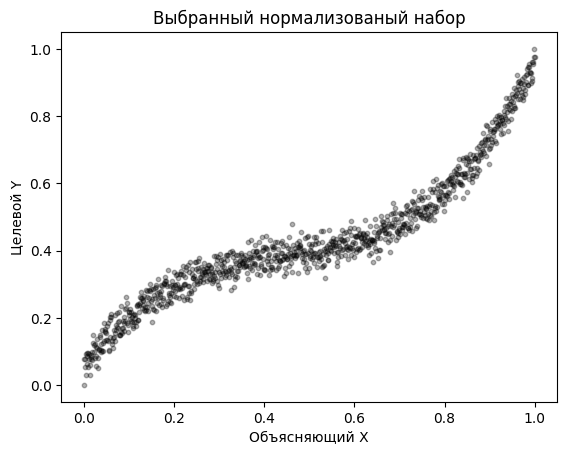

In [116]:
x_train = X.copy().reshape(-1,1)    # привести массив к столбчатой структуре
y_train = Y_polyn.copy().reshape(-1,1) # привести массив к столбчатой структуре

NormalizerX_EXAMPLE = MinMaxScaler().fit(x_train) 
NormalizerY_EXAMPLE = MinMaxScaler().fit(y_train)  
xNorm_train = NormalizerX_EXAMPLE.transform(x_train)
yNorm_train = NormalizerY_EXAMPLE.transform(y_train)

plt.scatter(xNorm_train, yNorm_train, s=markerSize, color="black", alpha=transparencyVal)
plt.title("Выбранный нормализованый набор")
plt.ylabel("Целевой Y")
plt.xlabel("Объясняющий X")

Для создания модели необходимо выбрать следующие параметры:
* Кол-во эпох - повторений для подбора коэфф. нейронов

* Структуру нейронной сети:
  - кол-во входных нейронов = кол-ву "x"
  - кол-во скрытых слоев и нейронов на каждом из них
  - кол-во выходных нейронов = кол-ву "y"

* Нелинейные функции активации для скрытых слоев, при их наличии:

    Некоторые доступные функции активации нейронов:
    - relu(...): Applies the rectified linear unit activation function.
    - elu(...): Exponential Linear Unit.
    - sigmoid(...): Sigmoid activation function, sigmoid(x) = 1 / (1 + exp(-x)).
    - tanh(...): Hyperbolic tangent activation function.
    - linear(...): Linear activation function (pass-through).

    Полный список функций активации смотрите на странице справке https://www.tensorflow.org/api_docs/python/tf/keras/activations


* Функцию оценки потерь (спобоб оценки ошибок между y_pred и y) = Среднеквадратичная ошибка (MSE)

    Доступные функиций оценки потерь смотрите на странице справки https://www.tensorflow.org/api_docs/python/tf/keras/losses


* Функцию оптимизации = Adam или SGD (Стохастический градиентный спуск)

    Доступные функиций активации смотрите на странице справки https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [117]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    globalEpochCounter = 1

    # 1) Параметры структуры
    input_size  = 1  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    hiddenLayer_size  = 100 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой
    model.add(tf.keras.layers.Dense(units=hiddenLayer_size,  activation=tf.keras.activations.relu,)) 
    #model.add(tf.keras.layers.Dense(units=20,  activation=tf.keras.activations.sigmoid,  ))

    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    
    # 2.2) Функция потерь и оптимизации
    fLoss = tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               200       
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None


### Первичное и дополнительное обучение 

currEpochNum: 10/10


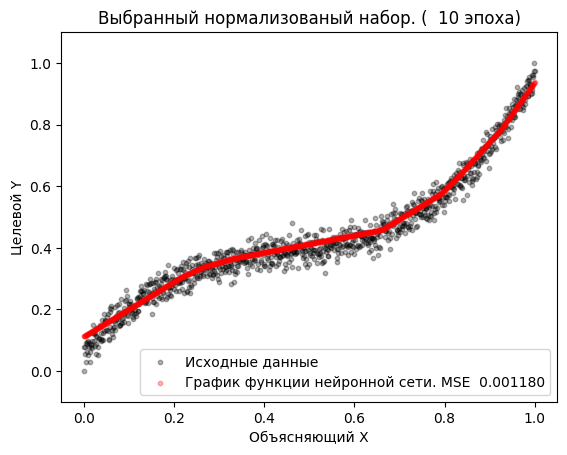

In [118]:
with tf.device('/CPU'):
    epochForTrain = 10

    for currEpochNum in range(1, epochForTrain+1):
        # 3) Цикл обучения/продолжения обучения сети             
        # xNorm_train, xNorm_test, yNorm_train, yNorm_test 
        history = model.fit(
            xNorm_train,  # обучающие X
            yNorm_train,  # обучающие Y
            epochs=5,   # кол-во эпох обучения
            batch_size=10, # кол-во образцов в каждой эпохе
            verbose=1,
        )
        # Только в условиях ЕДИНСТВЕННОГО x: Каждые N эпох выводить график текущей функции НС 
        if xNorm_train.shape[1] == 1: 
            if (currEpochNum) % 10 == 0:
                yNorm_pred = model.predict(xNorm_train)

                clear_output() # очистить окно вывода wait=False
                clear_output(wait=True) # очистить окно вывода
                print('currEpochNum: {}/{}'.format(currEpochNum, epochForTrain ))
                plt.figure()
                plt.scatter(xNorm_train, yNorm_train,  s=markerSize, color="black", alpha=transparencyVal, label =  "Исходные данные")
                plt.scatter(xNorm_train, yNorm_pred,   s=markerSize, color="red",   alpha=transparencyVal, label = f"График функции нейронной сети. MSE {history.history['loss'][-1]:>9.6f}")

                plt.title(f"Выбранный нормализованый набор. ({globalEpochCounter:>4} эпоха)")
                plt.ylabel("Целевой Y")
                plt.xlabel("Объясняющий X")
                plt.ylim( (-0.1, 1.1))
                plt.legend(loc='lower right')
                plt.pause(0.02) # временная пауза для отображения графика
                
        globalEpochCounter+=1

        # дополнение полной истории обучения 
        totalHistoryLossTrain.extend(history.history['loss'])
        if 'val_loss' in history.history.keys():
            totalHistoryLossTest.extend(history.history['val_loss'])

Text(0.5, 0, 'Эпохи обучения')

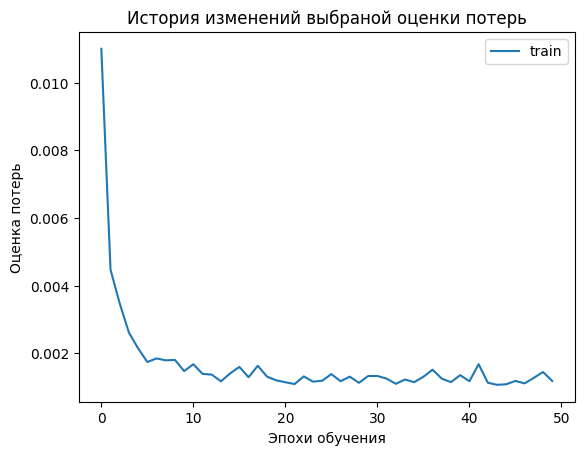

In [119]:
plt.plot(totalHistoryLossTrain, label='train')
if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')
plt.legend()
plt.title("История изменений выбраной оценки потерь")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")
#plt.ylim ( (0, 0.03) ) # область видимости для оси "Оценки потерь"

In [120]:
# Осмотрим последнии значения выбраной оценки потерь (LossVal = mean_squared_error)
totalHistoryLossTrain[-5:]

[0.0011816900223493576,
 0.0011091354535892606,
 0.0012737842043861747,
 0.0014447160065174103,
 0.0011800890788435936]

32/32 [==============================] - 0s 1ms/step
MAE :     0.026 (средняя абсолютная ошибка)
MSE :  0.000996 (среднеквадратичная ошибка)
RMSE:  0.031560 (кв. корень из среднеквадратичной ошибки)
R2  :     0.974 (коэфф. детерминации)


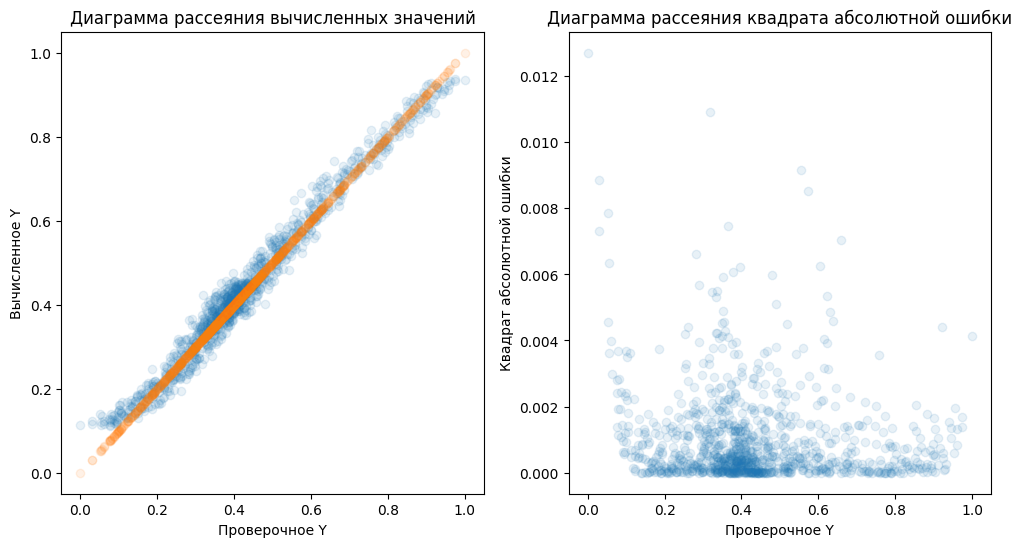

In [121]:
with tf.device('/CPU:0'):
    # Calculate predictions
    yNorm_pred = model.predict(xNorm_train)

GET_METRICS_SINGLE(yNorm_train, yNorm_pred)
PLOT34(yNorm_train, yNorm_pred)

## Приведение к новой единой шкале. Нормализация

### Выделение X и Y

Для выполнения следующих шагов разделим исходую таблицу на две отдельных
  - dfX содержащую только объясняющие признаки
  - dfY содержащую только целевой объясняемый признак

In [122]:
DataFrameX = DataFrame[features]
print("Размер таблицы", DataFrameX.shape)

DataFrameY = DataFrame[target]
print("Размер таблицы", DataFrameY.shape)


Размер таблицы (508, 6)
Размер таблицы (508, 1)


### Использование класса MinMaxScaler

В библиотеке sklearn, для выполнения процедуры нормализации, присутствует более удобный класс __sklearn.preprocessing.MinMaxScaler__, который содержит методы:

- __MinMaxScaler.fit(  df  )__ - вычисление значений __минимального__, __максимального значений__ и __диапазонна__ 

- __MinMaxScaler.transform( df )__ - прямого преобразования из истинного значения к приведенному

- __MinMaxScaler.inverse_transform( df )__ - обратного преобразования из приведенного значения в истинное

In [123]:
scalerNormX = MinMaxScaler()
scalerNormX.fit(DataFrameX)

DataFrameXNorm = pd.DataFrame (
  data    = scalerNormX.transform(DataFrameX), 
  columns = DataFrameX.columns,           
  index   = DataFrameX.index              
)
print("Размер таблицы", DataFrameXNorm.shape)
DataFrameXNorm[:5]

Размер таблицы (508, 6)


,smoker_no,sex_female,age,bmi,children,reg_southwest
4,0.0,0.0,0.282609,0.298146,0.0,0.0
5,0.0,0.0,0.608696,0.555370,0.2,0.0
6,0.0,0.0,0.413043,0.364957,0.6,0.0
8,0.0,0.0,0.913043,0.301487,0.0,0.0
11,0.0,0.0,0.826087,0.768498,0.0,0.0


In [124]:
scalerNormY = MinMaxScaler()
scalerNormY.fit(DataFrameY)

DataFrameYNorm = pd.DataFrame (
  data    = scalerNormY.transform(DataFrameY), 
  columns = DataFrameY.columns,           
  index   = DataFrameY.index              
)
print("Размер таблицы", DataFrameYNorm.shape)
DataFrameYNorm[:5]

Размер таблицы (508, 1)


,charges
4,0.050102
5,0.178572
6,0.151093
8,0.771150
11,0.260232


### Проверка

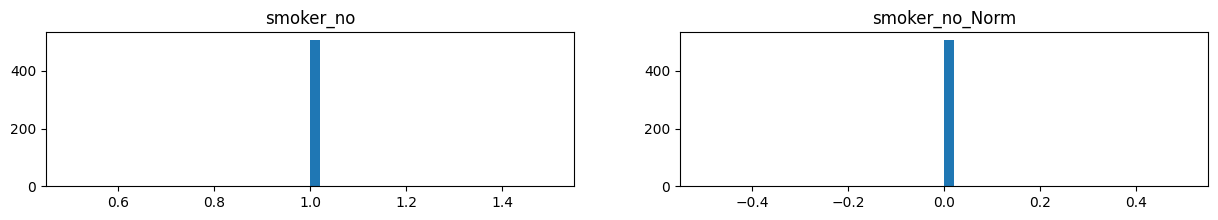

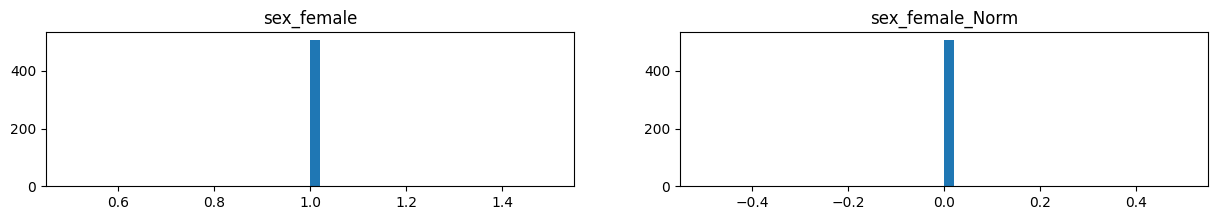

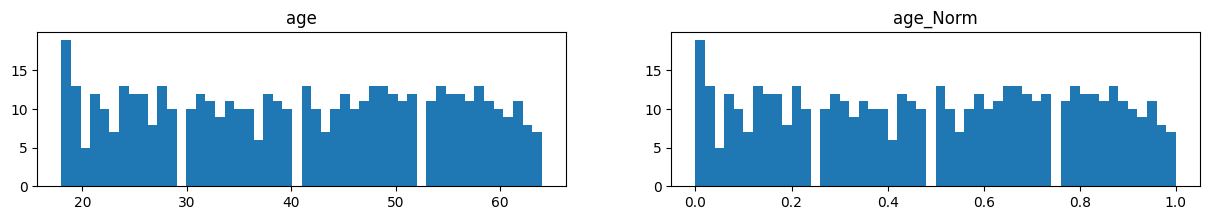

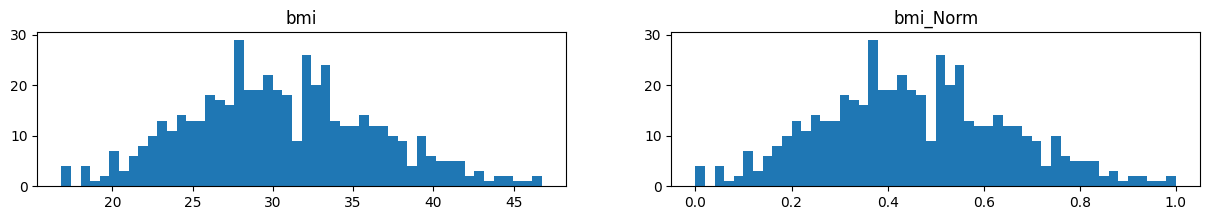

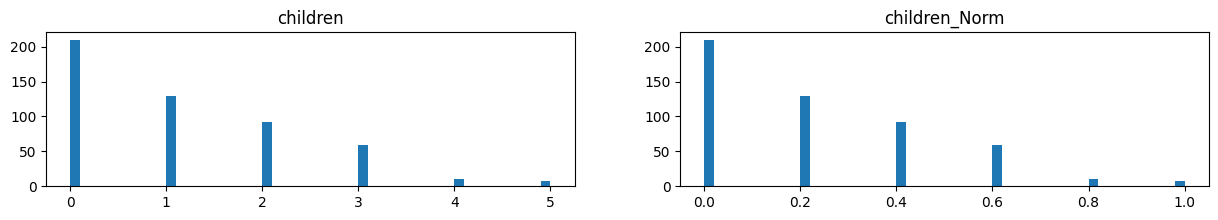

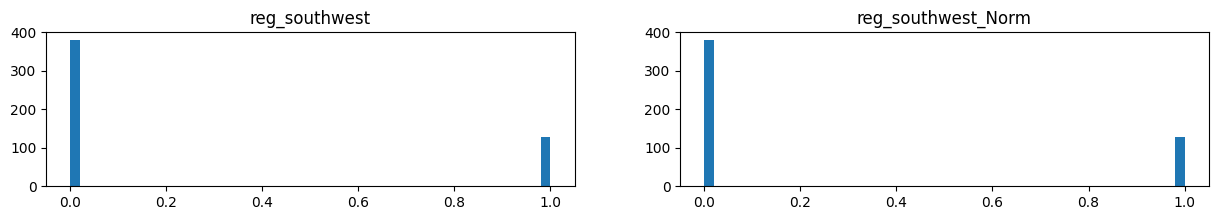

In [125]:
DataFrameXNorm.describe().loc[["min", "max" ]]
DataFrameYNorm.describe().loc[["min", "max" ]]

for i, colName in enumerate(DataFrameXNorm.columns ):
    plt.figure(figsize=(15, 2))
    
    plt.subplot(1, 2, 1)
    plt.hist(DataFrame[colName], bins=50)
    plt.title(colName)
    
    plt.subplot(1, 2, 2)
    plt.hist(DataFrameXNorm[colName], bins=50)
    plt.title(colName+"_Norm")

## Формирование тренировочной и проверочной выборок

In [126]:
target=['charges']
features=['smoker_no','sex_female','age','bmi','children','reg_southwest']
x_train, x_test, y_train, y_test =  train_test_split(
    DataFrameXNorm[features],    # исходные данные X
    DataFrameYNorm[target],      # исходные данные y
    test_size = 0.3, random_state=5, shuffle=True          
) 
#y_train = y_train['charges']
#y_test = y_test['charges']

print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test), 
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))
#x_train[:5]
#y_train[:5]

Кол-во элементов: 
  x_train: 355, y_train 355 
  x_test:  153, y_test  153 
  total x: 508, total y 508 


## Нейронная сеть: Построение модели от двух x без скрытого слоя

### Структура и параметры

In [127]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    
    # 1) Параметры структуры
    input_size  = 2  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    #hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    # 2.2) Ф. потерь и оптимизации
    fLoss     =tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


### Первичное и дополнительное обучение 

In [128]:
with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети             
    history = model.fit(
        x_train [['age','bmi']], y_train,

        validation_data=(  # проверочные X и Y
            x_test [['age','bmi']], y_test), 

        epochs=1000,   # кол-во эпох обучения
        batch_size=100, # кол-во образцов в каждой эпохе
        verbose=1,
    )
    
    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Epoch 1/1000
4/4 [==============================] - 1s 57ms/step - loss: 0.1547 - mean_squared_error: 0.1547 - val_loss: 0.1621 - val_mean_squared_error: 0.1621
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1275 - mean_squared_error: 0.1275 - val_loss: 0.1395 - val_mean_squared_error: 0.1395
Epoch 3/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1141 - mean_squared_error: 0.1141 - val_loss: 0.1272 - val_mean_squared_error: 0.1272
Epoch 4/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1084 - mean_squared_error: 0.1084 - val_loss: 0.1209 - val_mean_squared_error: 0.1209
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1056 - mean_squared_error: 0.1056 - val_loss: 0.1160 - val_mean_squared_error: 0.1160
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1019 - mean_squared_error: 0.1019 - val_loss: 0.1107 - val_mean_squared_error: 0.1107
Epoch 7/1000
4/4 [================

### Оценка точности

Text(0.5, 0, 'Эпохи обучения')

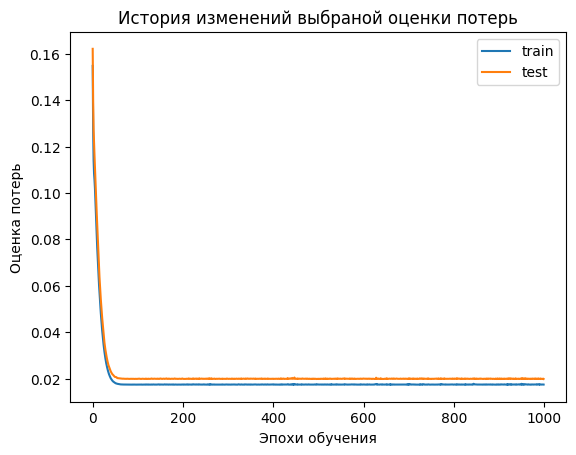

In [129]:
plt.plot(totalHistoryLossTrain, label='train')

if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')

plt.legend()
plt.title("История изменений выбраной оценки потерь")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")

5/5 [==============================] - 0s 997us/step
MAE :     0.075 (средняя абсолютная ошибка)
MSE :  0.019937 (среднеквадратичная ошибка)
RMSE:  0.141198 (кв. корень из среднеквадратичной ошибки)
R2  :     0.402 (коэфф. детерминации)


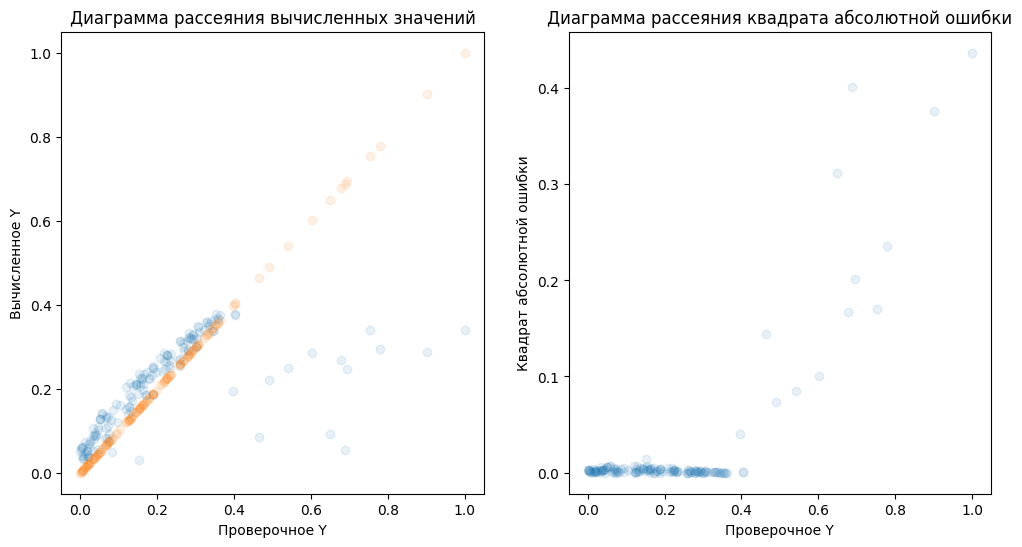

In [130]:
with tf.device('/CPU:0'):
    y_pred = model.predict( x_test [['age','bmi']] ) # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(y_test, y_pred)
PLOT34(y_test, y_pred)

### Получение весовых коэфф. w_i и bias для модели

In [131]:
# Осмотр весовых коэфф.  
for layer in model.layers:
  print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer}")
  print(f"\nВесовые коэфф. w_i  ") 
  print(layer.weights[0].numpy())
  print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_23;  Тип слоя: <keras.layers.core.dense.Dense object at 0x00000250ED6E01F0>

Весовые коэфф. w_i  
[[0.34311175]
 [0.01185754]]

Весовой коэфф. bias [0.02658486]


In [132]:
my3dplot(
    x_train, y_train,  not True,
    x_test,  y_test,   True, 
    y_pred,                True, 
    "age",  "bmi", *target)

## Нейронная сеть: Построение модели от двух x со скрытым слоем

### Структура и параметры

In [133]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    
    # 1) Параметры структуры
    input_size  = 2  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов

    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    model.add(tf.keras.layers.Dense(units=20,  activation=tf.keras.activations.relu,  )) # Скрытй слой, полносвязный, с нелинейной функцией активации
    #model.add(tf.keras.layers.Dense(units=10,  activation=tf.keras.activations.tanh,  )) # Скрытй слой, полносвязный, с нелинейной функцией активации
    model.add(tf.keras.layers.Dense(units=5,  activation=tf.keras.activations.sigmoid,  ))  # Скрытй слой, полносвязный, с нелинейной функцией активации
    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    # 2.2) Ф. потерь и оптимизации
    fLoss     =tf.keras.losses.mean_squared_error
    fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    #fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 20)                60        
                                                                 
 dense_25 (Dense)            (None, 5)                 105       
                                                                 
 dense_26 (Dense)            (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
None


### Первичное и дополнительное обучение 

In [134]:
with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети             
    history = model.fit(
        x_train [['age','children']], y_train,

        validation_data=(  # проверочные X и Y
            x_test [['age','children']], y_test), 

        epochs=1000,   # кол-во эпох обучения
        batch_size=100, # кол-во образцов в каждой эпохе
        verbose=1,
    )
    
    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Epoch 1/1000
4/4 [==============================] - 1s 66ms/step - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0359 - val_mean_squared_error: 0.0359
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 4/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 6/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 7/1000
4/4 [================

### Оценка точности

Text(0.5, 0, 'Эпохи обучения')

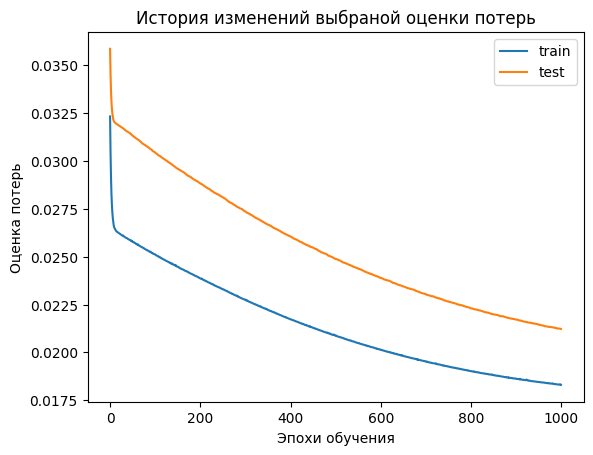

In [135]:
plt.plot(totalHistoryLossTrain, label='train')

if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')

plt.legend()
plt.title("История изменений выбраной оценки потерь")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")

5/5 [==============================] - 0s 2ms/step
MAE :     0.085 (средняя абсолютная ошибка)
MSE :  0.021223 (среднеквадратичная ошибка)
RMSE:  0.145682 (кв. корень из среднеквадратичной ошибки)
R2  :     0.364 (коэфф. детерминации)


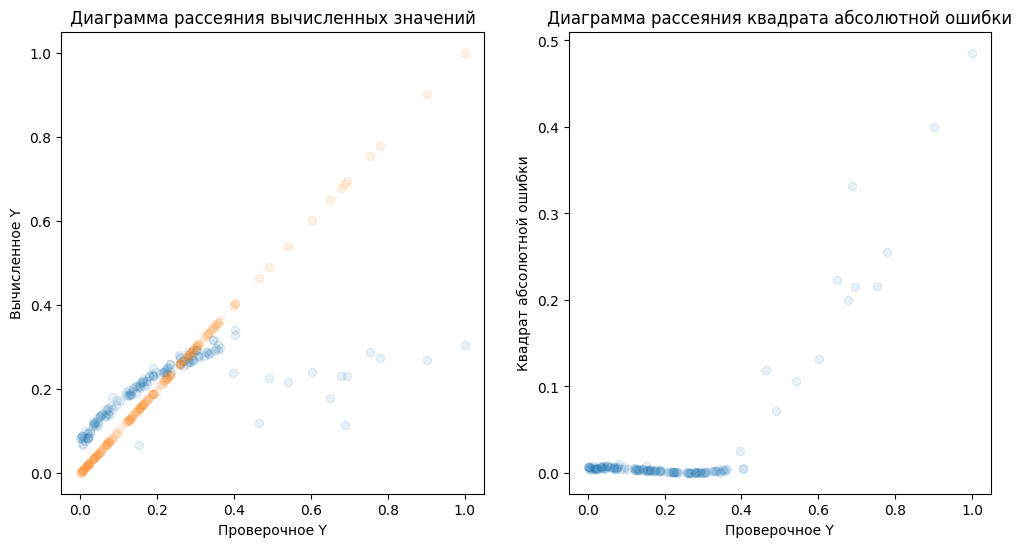

In [136]:
with tf.device('/CPU:0'):
    y_pred = model.predict( x_test [['age','children']] ) # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(y_test, y_pred)
PLOT34(y_test, y_pred)


### Получение весовых коэфф. w_i и bias для модели

In [137]:
# Осмотр весовых коэфф.  
for layer in model.layers:
  print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer}")
  print(f"\nВесовые коэфф. w_i  ") 
  print(layer.weights[0].numpy())
  print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_24;  Тип слоя: <keras.layers.core.dense.Dense object at 0x00000250FB7C6F50>

Весовые коэфф. w_i  
[[-0.45392776  0.4207799  -0.41384548 -0.36179963  0.03896416  0.4200652
  -0.2298311   0.00605881  0.22714123  0.4569568  -0.10760047  0.31767005
  -0.43331486  0.55721176 -0.05595294 -0.3317978   0.1882294   0.44841605
   0.05184479 -0.17586538]
 [ 0.07803681  0.5208308   0.04603863  0.2145631   0.2949556  -0.1032402
  -0.10042393 -0.14662129 -0.4182124  -0.15111305  0.13641867 -0.21831873
  -0.367805    0.50990117 -0.44258562  0.16970427 -0.11653984 -0.12295794
  -0.43613786  0.39533854]]

Весовой коэфф. bias [-0.0216304  -0.0089915   0.04819455  0.00110499 -0.0012646  -0.01432219
  0.          0.00867102  0.00771554  0.00049894  0.01407137  0.04433545
  0.         -0.00813069  0.          0.00495395  0.0029224   0.00913164
 -0.00347511  0.03192182]

Имя слоя:dense_25;  Тип слоя: <keras.layers.core.dense.Dense object at 0x00000250FB2D8100>

Весовые коэфф. w_i  
[[ 0.1874

In [138]:
my3dplot(
    x_train, y_train,    True,
    x_test,  y_test,   True, 
    y_pred,                True, 
    "bmi",  "children", *target)

## Нейронная сеть: Построение модели от нескольких x без скрытого слоя

### Структура и параметры

In [139]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    
    # 1) Параметры структуры
    input_size  = 6  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов
    #hiddenLayer_size  = 10 # кол-во узлов на скрытом слое

    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    
    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    # 2.2) Ф. потерь и оптимизации
    fLoss     =tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None


### Первичное и дополнительное обучение 

In [140]:
#features=['smoker_no','sex_female','age','bmi','children','reg_southwest']
with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети             
    history = model.fit(
        x_train [['smoker_no','sex_female','age','bmi','children','reg_southwest']], y_train,

        validation_data=(  # проверочные X и Y
            x_test [['smoker_no','sex_female','age','bmi','children','reg_southwest']], y_test), 

        epochs=1000,   # кол-во эпох обучения
        batch_size=100, # кол-во образцов в каждой эпохе
        verbose=1,
    )
    
    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Epoch 1/1000
4/4 [==============================] - 1s 58ms/step - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0415 - val_mean_squared_error: 0.0415
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 7/1000
4/4 [================

### Оценка точности

Text(0.5, 0, 'Эпохи обучения')

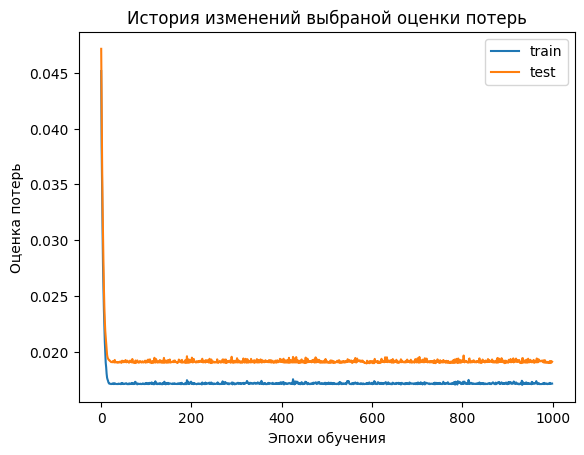

In [141]:
plt.plot(totalHistoryLossTrain, label='train')

if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')

plt.legend()
plt.title("История изменений выбраной оценки потерь")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")

5/5 [==============================] - 0s 1ms/step
MAE :     0.069 (средняя абсолютная ошибка)
MSE :  0.019130 (среднеквадратичная ошибка)
RMSE:  0.138313 (кв. корень из среднеквадратичной ошибки)
R2  :     0.426 (коэфф. детерминации)


Text(0, 0.5, 'Вычисленное Y')

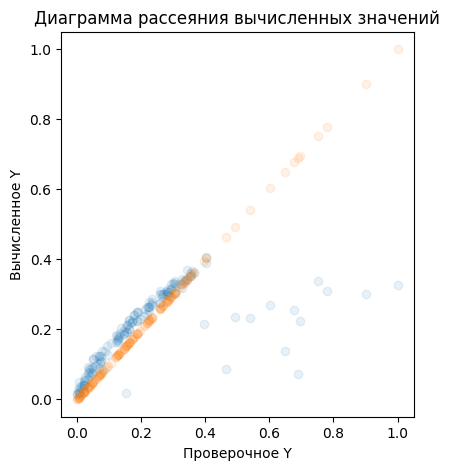

In [142]:
with tf.device('/CPU:0'):
    y_pred = model.predict( x_test [['smoker_no','sex_female','age','bmi','children','reg_southwest']] ) # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(y_test, y_pred)
#PLOT34(y_test, y_pred)

#Построим графики для визуальной оценки качества модели
plt.figure(figsize=(10,5))
# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test, y_pred,  alpha=0.1)
plt.scatter(y_test, y_test,  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')


### Получение весовых коэфф. w_i и bias для модели

In [143]:
# Осмотр весовых коэфф.  
for layer in model.layers:
  print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer}")
  print(f"\nВесовые коэфф. w_i  ") 
  print(layer.weights[0].numpy())
  print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_27;  Тип слоя: <keras.layers.core.dense.Dense object at 0x00000250FB93BB20>

Весовые коэфф. w_i  
[[-7.5310558e-01]
 [ 6.3944924e-01]
 [ 3.4073874e-01]
 [ 3.7480341e-04]
 [ 7.6181635e-02]
 [-2.6286950e-02]]

Весовой коэфф. bias [0.01834431]


## Нейронная сеть: Построение модели от нескольких x со скрытым слоем

### Структура и параметры

In [144]:
with tf.device('/CPU:0'):
    
    totalHistoryLossTrain=[] # Вспомогательный список для хранение полной истории обучения
    totalHistoryLossTest=[]  # Вспомогательный список для хранение полной истории обучения
    
    # 1) Параметры структуры
    input_size  = 6  # кол-во входных  узлов
    output_size = 1  # кол-во выходных узлов


    # 2.1) Построение модели нейронной сети
    # Многослойная    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_size,))) # Входной слой
    # параметр "units" - кол-во узлов/нейронов на данном слое
    # параметр "activation" - вид функции активации
    model.add(tf.keras.layers.Dense(units=60,  activation=tf.keras.activations.relu,  )) # Скрытй слой, полносвязный, с нелинейной функцией активации
    model.add(tf.keras.layers.Dense(units=30,  activation=tf.keras.activations.tanh  ))  # Скрытй слой, полносвязный, с нелинейной функцией активации
    model.add(tf.keras.layers.Dense(units=15,  activation=tf.keras.activations.sigmoid,  ))  # Скрытй слой, полносвязный, с нелинейной функцией активации
    model.add(tf.keras.layers.Dense(units=output_size,  activation=tf.keras.activations.linear)) # Выходной слой, с линейной функцией активации
    
    # 2.2) Ф. потерь и оптимизации
    fLoss     =tf.keras.losses.mean_squared_error
    #fOptimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
    fOptimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    fMetric  =[tf.keras.losses.mean_squared_error]
    
    model.compile(
        loss      =fLoss, 
        optimizer =fOptimizer, 
        metrics   =[ fMetric ]
    )   
    print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 60)                420       
                                                                 
 dense_29 (Dense)            (None, 30)                1830      
                                                                 
 dense_30 (Dense)            (None, 15)                465       
                                                                 
 dense_31 (Dense)            (None, 1)                 16        
                                                                 
Total params: 2,731
Trainable params: 2,731
Non-trainable params: 0
_________________________________________________________________
None


### Первичное и дополнительное обучение 

In [145]:
with tf.device('/CPU:0'):
    # 3) Цикл обучения/продолжения обучения сети             
    history = model.fit(
        x_train [['smoker_no','sex_female','age','bmi','children','reg_southwest']], y_train,

        validation_data=(  # проверочные X и Y
            x_test [['smoker_no','sex_female','age','bmi','children','reg_southwest']], y_test), 

        epochs=1000,   # кол-во эпох обучения
        batch_size=100, # кол-во образцов в каждой эпохе
        verbose=1,
    )
    
    totalHistoryLossTrain.extend(history.history['loss'])
    if 'val_loss' in history.history.keys():
        totalHistoryLossTest.extend(history.history['val_loss'])

Epoch 1/1000
4/4 [==============================] - 1s 67ms/step - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.0946 - val_mean_squared_error: 0.0946
Epoch 2/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0807 - mean_squared_error: 0.0807 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 3/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 4/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 5/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 7/1000
4/4 [================

### Оценка точности

Text(0.5, 0, 'Эпохи обучения')

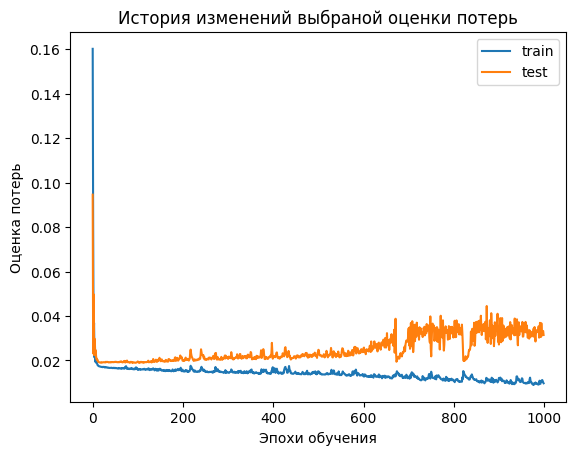

In [146]:
plt.plot(totalHistoryLossTrain, label='train')

if 'val_loss' in history.history.keys():
    plt.plot(totalHistoryLossTest, label='test')

plt.legend()
plt.title("История изменений выбраной оценки потерь")
plt.ylabel("Оценка потерь")
plt.xlabel("Эпохи обучения")

5/5 [==============================] - 0s 2ms/step
MAE :     0.094 (средняя абсолютная ошибка)
MSE :  0.031462 (среднеквадратичная ошибка)
RMSE:  0.177376 (кв. корень из среднеквадратичной ошибки)
R2  :     0.057 (коэфф. детерминации)


Text(0, 0.5, 'Вычисленное Y')

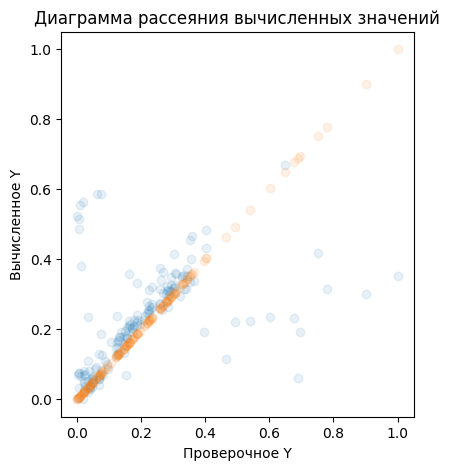

In [147]:
with tf.device('/CPU:0'):
    y_pred = model.predict( x_test [['smoker_no','sex_female','age','bmi','children','reg_southwest']] ) # требуется передать таблицу с кол-ом столбцов равным кол-ву входных нейронов

GET_METRICS_SINGLE(y_test, y_pred)
#PLOT34(y_test, y_pred)

#Построим графики для визуальной оценки качества модели
plt.figure(figsize=(10,5))
# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test, y_pred,  alpha=0.1)
plt.scatter(y_test, y_test,  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений')
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')


### Получение весовых коэфф. w_i и bias для модели

In [148]:
# Осмотр весовых коэфф.  
for layer in model.layers:
  print(f"\nИмя слоя:{layer.name};  Тип слоя: {layer}")
  print(f"\nВесовые коэфф. w_i  ") 
  print(layer.weights[0].numpy())
  print(f"\nВесовой коэфф. bias {layer.bias.numpy()}")


Имя слоя:dense_28;  Тип слоя: <keras.layers.core.dense.Dense object at 0x00000250FD459EA0>

Весовые коэфф. w_i  
[[-2.42916211e-01  2.68492699e-01 -1.12419561e-01  2.01054394e-01
  -1.37157023e-01 -1.99664533e-02 -9.20494050e-02 -1.73992440e-01
  -9.39249694e-02 -6.50552362e-02  2.97571659e-01  2.33948112e-01
   5.73727190e-02  1.32878304e-01 -2.72620827e-01 -2.08559424e-01
  -1.14134982e-01 -1.34522825e-01 -2.60463059e-01  2.52854705e-01
   6.10425770e-02 -2.79751271e-01 -2.60338843e-01  6.43619001e-02
   1.70860738e-01 -1.00398302e-01 -5.67881465e-02 -1.12846211e-01
  -1.38084352e-01 -2.30334818e-01 -1.86560899e-01 -1.06902748e-01
   2.58643627e-01  1.43950731e-01 -1.88776061e-01 -1.98079109e-01
   1.01360142e-01 -1.55602723e-01 -1.52191386e-01 -2.07011133e-01
  -1.18495658e-01 -2.90939599e-01 -5.89823723e-03 -5.44783771e-02
  -2.11757481e-01 -1.42329857e-01 -2.80074239e-01  2.83046961e-01
  -2.11099386e-02 -4.48511243e-02 -2.88240552e-01 -2.70332783e-01
  -2.96663791e-01 -1.0946995

## Сравнение полученных моделей

In [149]:
DataResults = pd.DataFrame (
    [
        ["'age','bmi'",     "2->1",       1000, 0.081, 0.242977, 0.059038 , 0.199],
        ["'age','bmi'",  "2->...->...->1",1000, 0.033 ,  0.249246 , 0.062123 , 0.193 ],
        ["Все",    "5->1",                1000, 0.739 ,  0.129536 , 0.016780 , 0.089 ],
        ["Все",    "5->...->...->1",      1000, 0.761 ,  0.123962 ,0.015366 , 0.068 ],
    ],
    columns= ["Признаки", "Структура", "Эпох Обучения", "R2", "RMSE", "MSE", "MAE" ],
 )
print("MAE  - средняя абсолютная ошибка" +
    "\nMSE  - среднеквадратичная ошибка" +
    "\nRMSE - кв. корень из среднеквадратичной ошибки" +
    "\nR2   - коэфф. детерминации")
DataResults

MAE  - средняя абсолютная ошибка
MSE  - среднеквадратичная ошибка
RMSE - кв. корень из среднеквадратичной ошибки
R2   - коэфф. детерминации


,Признаки,Структура,Эпох Обучения,R2,RMSE,MSE,MAE
0,"'age','bmi'",2->1,1000,0.081,0.242977,0.059038,0.199
1,"'age','bmi'",2->...->...->1,1000,0.033,0.249246,0.062123,0.193
2,Все,5->1,1000,0.739,0.129536,0.016780,0.089
3,Все,5->...->...->1,1000,0.761,0.123962,0.015366,0.068
